<a href="https://colab.research.google.com/github/odharamaggi/Analise_Dados_Python/blob/main/An%C3%A1lise_de_Dados_com_Python_e_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Seleção e transformação dos dados*



In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
# Importando arquivos

df = pd.read_excel("/content/drive/MyDrive/datasets/AdventureWorks.xlsx")

In [4]:
# Visualizando primeiras linhas do dataset

df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [10]:
# Verificando quantidade de linhas e colunas

df.shape

(904, 16)

In [11]:
# Verificando o nome e o tipo de dado em cada coluna

df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [42]:
# Verificando se há dados vazios

df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo Total       0
Lucro             0
Tempo de envio    0
dtype: int64

In [43]:
# Criando a coluna de "Custo Total"

df["custo_total"] = df["Custo Unitário"].mul(df["Quantidade"])

In [44]:
# Criando a coluna de "Lucro"

df["lucro"] = df["Valor Venda"] - df["Custo Total"]

In [45]:
# Criando coluna de "Tempo de envio" com o tipo de dado numérico

df["tempo_de_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [46]:
# Confirmando se o tipo de dado da nova coluna "Tempo de envio" é realmente numérico

df["tempo_de_envio"].dtypes

dtype('int64')

In [47]:
# Visualizando as novas colunas inseridas

df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,...,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo de envio,custo_total,lucro,tempo_de_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,...,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,...,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5,2091.48,2456.52,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,...,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6,2091.48,2456.52,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,...,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6,2091.48,2456.52,6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,...,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7,2091.48,2456.52,7


## *Analisando os dados*

In [93]:
# Configurando o formato do tipo de dado float

pd.options.display.float_format = '{:20,.2f}'.format

In [97]:
# Qual o total de produtos vendidos?

df.groupby("Produto")["Quantidade"].sum().sort_values(ascending =False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

In [92]:
# Qual o lucro por ano?

df.groupby([df["Data Venda"].dt.year])["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [88]:
#Qual o lucro por ano e por marca?

df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [68]:
# Criando um novo dataframe para armazenar o resumo sintético: lucro por marca e ano

lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [64]:
# Qual o tempo médio de envio por marca?

df.groupby("Marca")["tempo_de_envio"].mean()

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: tempo_de_envio, dtype: float64

In [114]:
# Informações estatísticas sobre o tempo de envio (quantidade, média, desvio padrão, valor mínimo, quartis e valor máximo)

df["tempo_de_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: tempo_de_envio, dtype: float64

In [99]:
# Criando dataframe apenas com os dados referentes a 2009

df_2009 = df[df["Data Venda"].dt.year == 2009]

In [100]:
# Visualizando o dataframe referente a 2009

df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,...,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo de envio,custo_total,lucro,tempo_de_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,...,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,...,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,...,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,...,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,...,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4,"2,091.48","2,456.52",4


## *Visualização dos dados*

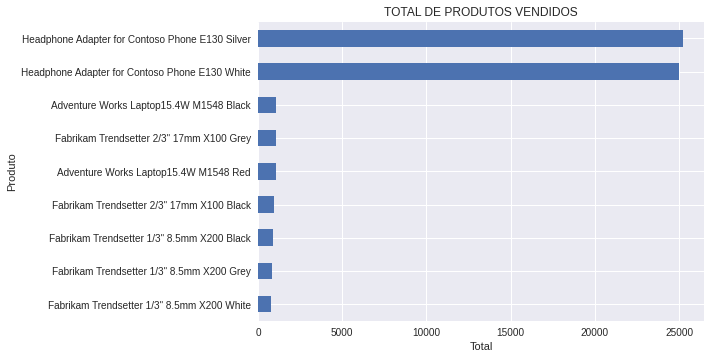

In [79]:
# Gráfico: TOTAL DE PRODUTOS VENDIDOS

df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = True).plot.barh(title="TOTAL DE PRODUTOS VENDIDOS")
plt.xlabel("Total")
plt.ylabel("Produto");

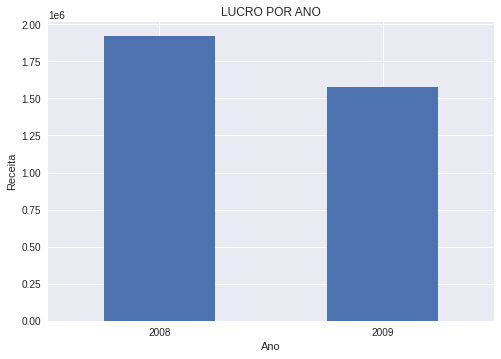

In [104]:
# Gráfico: LUCRO POR ANO

df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title = "LUCRO POR ANO")
plt.xlabel("Ano")
plt.ylabel("Receita")
plt.xticks(rotation = 'horizontal');

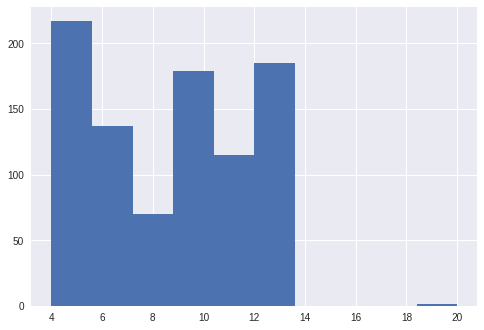

In [116]:
# Gráfico: DISTRIBUIÇÃO DO TEMPO DE ENVIO

plt.hist(df["tempo_de_envio"]);

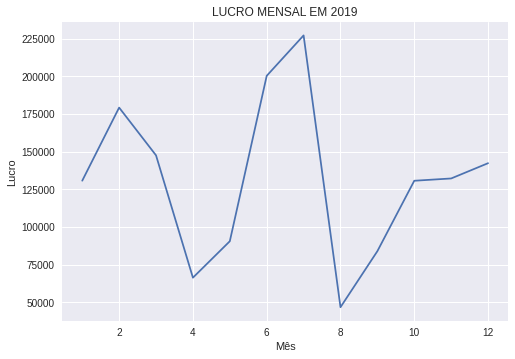

In [103]:
# Gráfico: LUCRO MENSAL EM 2019

df_2009.groupby(df["Data Venda"].dt.month)["lucro"].sum().plot(title = "LUCRO MENSAL EM 2019")
plt.xlabel("Mês")
plt.ylabel("Lucro");

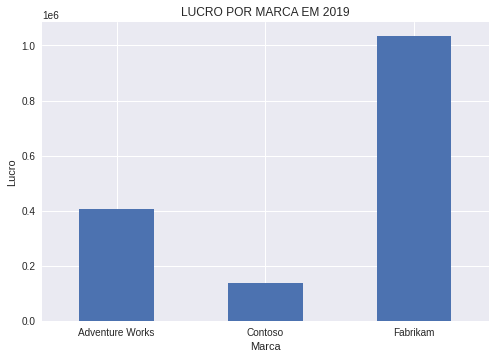

In [107]:
# Gráfico: LUCRO POR MARCA EM 2019

df_2009.groupby("Marca")["lucro"].sum().plot.bar(title = "LUCRO POR MARCA EM 2019")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation = 'horizontal');

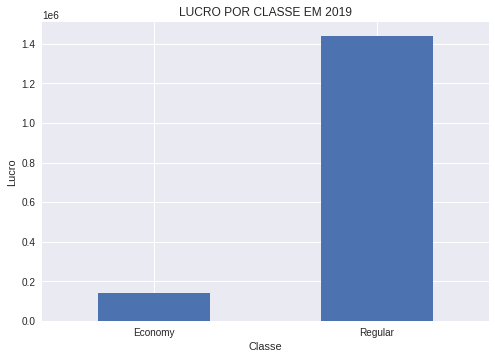

In [110]:
# Gráfico: LUCRO POR CLASSE EM 2019

df_2009.groupby("Classe")["lucro"].sum().plot.bar(title = "LUCRO POR CLASSE EM 2019")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation = 'horizontal');

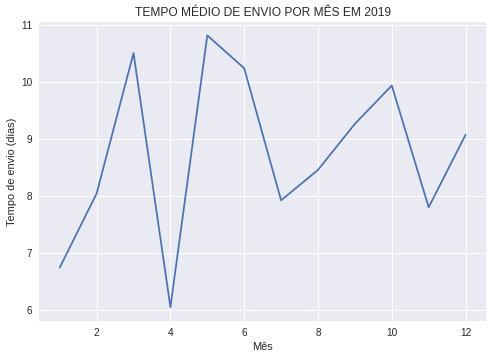

In [120]:
# Gráfico: TEMPO MÉDIO DE ENVIO EM 2019

df_2009.groupby(df["Data Venda"].dt.month)["tempo_de_envio"].mean().plot(title = "TEMPO MÉDIO DE ENVIO POR MÊS EM 2019")
plt.xlabel("Mês")
plt.ylabel("Tempo de envio (dias)");